<a href="https://colab.research.google.com/github/AyushYele25/AyushYele/blob/main/Movies_Rating_Predicition_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
# Load dataset, specifying the encoding as 'latin-1'
data = pd.read_csv('/content/IMDb Movies India.csv.zip', encoding='latin-1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
# Handle missing values (drop rows where target variable 'rating' is missing)
data = data.dropna(subset=['Rating'])

In [7]:
#define features and target
features = ['Year','Duration','Votes']
target = 'Rating'

In [8]:
  #convert 'Year', 'Duration', and 'Votes' to numerical , handling errors
  data['Year'] = pd.to_numeric(data['Year'].astype(str).str.strip('()'), errors='coerce')
  data['Duration'] = pd.to_numeric(data['Duration'].astype(str).str.extract('(\d+)').squeeze(), errors='coerce')
  data['Votes'] = pd.to_numeric(data['Votes'].astype(str).str.replace(',', '').str.strip('()'), errors='coerce')

<ipython-input-8-feb38f0ab9ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = pd.to_numeric(data['Year'].astype(str).str.strip('()'), errors='coerce')
<ipython-input-8-feb38f0ab9ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration'] = pd.to_numeric(data['Duration'].astype(str).str.extract('(\d+)').squeeze(), errors='coerce')
<ipython-input-8-feb38f0ab9ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [9]:
# handling the missing data
data = data.dropna(subset=['Year', 'Duration', 'Votes'])

In [10]:
#spilt data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    data[features], data[target], test_size=0.20, random_state=49
)
x_test

,Year,Duration,Votes
7610,1977,210.0,357
2023,1981,121.0,30
1449,2001,102.0,432
7217,1981,152.0,501
85,1981,122.0,392
...,...,...,...
15047,2006,115.0,673
12101,1969,144.0,197
5763,1992,160.0,51
5564,2018,131.0,1470


In [11]:
#Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
# make predicitions
y_pred = model.predict(x_test)
print(y_pred)

[5.72025359 6.22439588 6.00991264 ... 5.78139916 5.5459962  6.17138331]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE: 1.060125413858023
MSE: 1.7800407706649868
RMSE: 1.3341816857778355


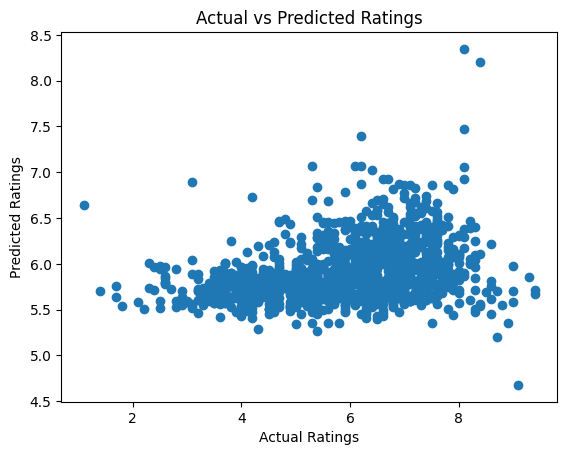

In [13]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plot predicted vs actual ratings
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()